<a href="https://colab.research.google.com/github/urenajose/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Jose_Urena_DSPT8_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [2]:
##### Begin Working Here #####
import pandas as pd
import numpy as np


In [ ]:
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns', 5)

##Housing Data Head, info & tail

In [ ]:
housing_data = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
print(housing_data.head(5))
print("Tatil")
print(housing_data.tail(5))

   Id  MSSubClass  ... SaleCondition  SalePrice
0   1          60  ...        Normal     208500
1   2          20  ...        Normal     181500
2   3          60  ...        Normal     223500
3   4          70  ...       Abnorml     140000
4   5          60  ...        Normal     250000

[5 rows x 81 columns]
Tatil
        Id  MSSubClass  ... SaleCondition  SalePrice
1455  1456          60  ...        Normal     175000
1456  1457          20  ...        Normal     210000
1457  1458          70  ...        Normal     266500
1458  1459          20  ...        Normal     142125
1459  1460          20  ...        Normal     147500

[5 rows x 81 columns]


In [ ]:

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#BedroomAbvGR


In [ ]:
housing_data[["BedroomAbvGr",'TotRmsAbvGrd']].head(10)

,BedroomAbvGr,TotRmsAbvGrd
0,3,8
1,3,6
2,3,6
3,3,7
4,4,9
5,1,5
6,3,7
7,3,7
8,2,8
9,2,5


In [ ]:
housing_data.BedroomAbvGr.head(10)

0    3
1    3
2    3
3    3
4    4
5    1
6    3
7    3
8    2
9    2
Name: BedroomAbvGr, dtype: int64

In [ ]:
housing_data["BedroomAbvGr"].head(10)

0    3
1    3
2    3
3    3
4    4
5    1
6    3
7    3
8    2
9    2
Name: BedroomAbvGr, dtype: int64

#LotFrontage

In [ ]:
housing_data["LotFrontage"].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [ ]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns', 100)

In [ ]:
housing_data["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [ ]:
housing_data["LotFrontage"].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
58.0       7
41.0       6
105.0      6
54.0       6
94.0       6
48.0       6
110.0      6
30.0       6
89.0       6
81.0       6
91.0       6
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3

In [ ]:
type(np.nan)

float

In [ ]:
housing_data['LotFrontage'].isnull().sum()

259

In [ ]:
housing_data['LotFrontage'].dropna(inplace=True)
housing_data['LotFrontage'].isnull().sum()

0

#CrossTabs

In [ ]:
Sub_housing_data = housing_data[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
Sub_housing_data.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


In [ ]:
Sub_housing_data['TotalSquareFootage'] = Sub_housing_data['TotalBsmtSF']+Sub_housing_data['1stFlrSF']+Sub_housing_data['2ndFlrSF']
Sub_housing_data.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [ ]:
Sub_housing_data['PricePerSqFt']= Sub_housing_data['SalePrice']/Sub_housing_data['TotalSquareFootage']
Sub_housing_data.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


In [ ]:
housing_data['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [ ]:
housing_data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
pd.crosstab(housing_data['Alley'], housing_data['LotShape'])

LotShape,IR1,IR2,IR3,Reg
Alley,,,,
Grvl,4,0,1,45
Pave,7,2,0,32


In [ ]:
pd.crosstab(housing_data['Alley'], housing_data['LotShape'],margins=True)

LotShape,IR1,IR2,IR3,Reg,All
Alley,,,,,
Grvl,4,0,1,45,50
Pave,7,2,0,32,41
All,11,2,1,77,91


In [ ]:
pd.crosstab(housing_data['Alley'],housing_data['LotShape'],normalize='index' )

LotShape,IR1,IR2,IR3,Reg
Alley,,,,
Grvl,0.080000,0.00000,0.02,0.900000
Pave,0.170732,0.04878,0.00,0.780488


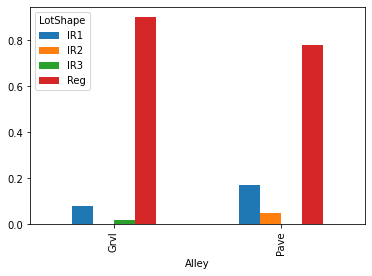

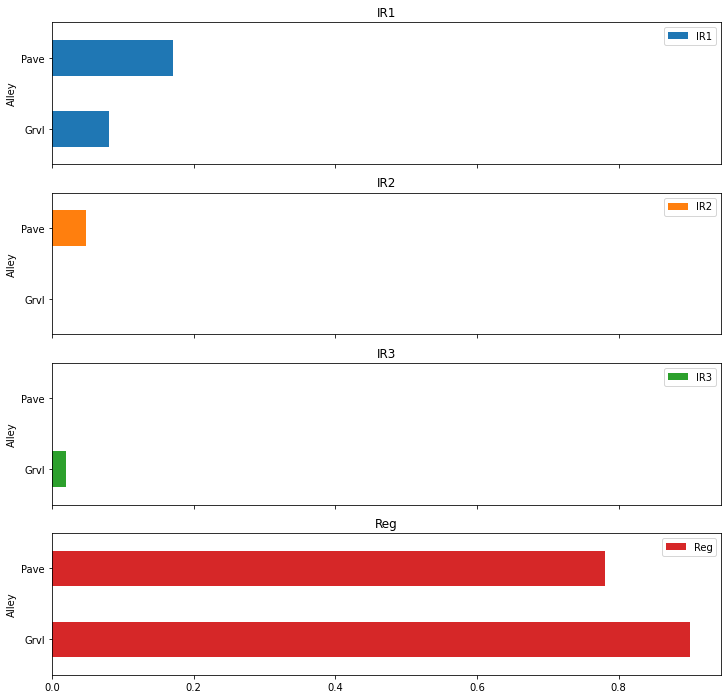

In [ ]:
results = pd.crosstab(housing_data['Alley'],housing_data['LotShape'],normalize='index' )
results.plot(kind ='bar');
results.plot(kind = 'barh',subplots=True,figsize=(12, 12));
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

#Strings with Pandas

In [4]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-07-13 16:25:15--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.149.64.5, 34.213.98.158, 52.42.46.127
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.149.64.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [     <=>            ]  22.21M  1.66MB/s    in 13s     

2020-07-13 16:25:29 (1.65 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23289953]



In [5]:
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [ ]:
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns', 5)

In [6]:
df = pd.read_csv('LoanStats_2018Q4.csv')
print(df.head(5),"\n",df.tail(5),"\n")
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
print(df.head(5),"\n",df.tail(5))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns', 50)

In [ ]:
print(df.shape)
print(df.info())

(128412, 144)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 144 entries, id to settlement_term
dtypes: float64(57), int64(51), object(36)
memory usage: 141.1+ MB
None


In [ ]:
df.isnull().sum().sort_values(ascending=False)
#id,member_id,url,desc,settlement_percentage,settlement_term,settlemet_date,url

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
settlement_percentage                         127518
settlement_term                               127518
settlement_date                               127518
debt_settlement_flag_date                     127518
settlement_status                             127518
settlement_amount                             127518
sec_app_mths_since_last_major_derog           123258
hardship_loan_status                          116534
hardship_reason                               115711
deferral_term                                 115710
hardship_type                                 115710
hardship_status                               115710
hardship_start_date                           115710
hardship_end_date                             115710
hardship_length                               

In [ ]:
df_new = df.drop(['id','member_id','url','desc','settlement_percentage','settlement_term'], axis=1)
df_new.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 138 entries, loan_amnt to settlement_amount
dtypes: float64(51), int64(51), object(36)
memory usage: 135.2+ MB


#custom Function with for loop | .apply()

In [ ]:
print("type in cell 4 in int_rate column", type(df['int_rate'][3]))
print(df['int_rate'].head(10))
print(df['int_rate'])

type in cell 4 in int_rate column <class 'str'>
0      8.81%
1     12.98%
2     14.47%
3     17.97%
4     23.40%
5     26.31%
6     19.92%
7     23.40%
8     23.40%
9     11.80%
Name: int_rate, dtype: object
0           8.81%
1          12.98%
2          14.47%
3          17.97%
4          23.40%
           ...   
128407     15.02%
128408     15.02%
128409     13.56%
128410     11.06%
128411     16.91%
Name: int_rate, Length: 128412, dtype: object


In [ ]:
int_rate = ' 12.98%'

In [ ]:
int_rate.strip()

'12.98%'

In [ ]:
int_rate.strip("%")

' 12.98'

In [ ]:
int_rate.strip().strip('%')

'12.98'

In [ ]:
float('12.98')

12.98

In [ ]:
float(int_rate.strip().strip('%'))

12.98

In [ ]:
type(float(int_rate.strip().strip("%")))

float

In [ ]:
def myfunc(cell_contents):
  return float(cell_contents.strip().strip("%"))


In [ ]:
type(myfunc(int_rate))

float

In [ ]:
new_list = []
#for loop
for cell in df['int_rate']:
  new_list.append(myfunc(cell))

In [ ]:
new_list[:10]

[8.81, 12.98, 14.47, 17.97, 23.4, 26.31, 19.92, 23.4, 23.4, 11.8]

In [ ]:
df['int_rate_cleaned'] = pd.Series(new_list)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned,int_rate_cleaned2
0,NaN,NaN,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.81,8.81
1,NaN,NaN,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,12.98
2,NaN,NaN,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,...,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,17.97
4,NaN,NaN,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,...,NaN,Y,CVD19SKIP,INCOME_CURTAILMENT,ACTIVE,4.0,0.0,May-2020,Jul-2020,May-2020,4.0,0.0,ACTIVE,1086.68,9481.75,55.80,N,NaN,NaN,NaN,NaN,NaN,NaN,23.40,23.40


In [ ]:
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [ ]:
df['int_rate_cleaned2'] = df['int_rate'].apply(myfunc)
df.head()
#same as above but using apply

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned,int_rate_cleaned2
0,NaN,NaN,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,8.81,8.81
1,NaN,NaN,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,12.98
2,NaN,NaN,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,...,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,17.97
4,NaN,NaN,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,...,NaN,Y,CVD19SKIP,INCOME_CURTAILMENT,ACTIVE,4.0,0.0,May-2020,Jul-2020,May-2020,4.0,0.0,ACTIVE,1086.68,9481.75,55.80,N,NaN,NaN,NaN,NaN,NaN,NaN,23.40,23.40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 144 entries, id to settlement_term
dtypes: float64(57), int64(51), object(36)
memory usage: 141.1+ MB


In [ ]:
df['emp_title'].value_counts(dropna=False)[:20]

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [ ]:
len(df['emp_title'].unique())

43893

In [ ]:
df['emp_title'].isnull().sum()

20947

In [ ]:
def clean_title(job_title):
  if isinstance(job_title, str):
    return job_title.title().strip()
  else:
    return "unknown"

In [ ]:
empty_list=[]
for title in examples:
  empty_list.append(clean_title(title))

In [ ]:
[clean_title(title) for title in examples]

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [ ]:
df['emp_title'] = df['emp_title'].apply(clean_title)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,...,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,...,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,...,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,...,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,May-2007,0,NaN,NaN,14,0,52013,83.1%,20,w,8968.74,8968.74,7057.950000,7057.95,...,66.7,0,0,137276,87876,58600,74676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,CVD19SKIP,INCOME_CURTAILMENT,ACTIVE,4.0,0.0,May-2020,Jul-2020,May-2020,4.0,0.0,ACTIVE,1086.68,9481.75,55.80,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df['emp_title'].unique())

34902

In [ ]:
df['emp_title'].isnull().sum()

0

#Dates & Time

In [8]:
#as a for loop
mylist=[]
for col in df.columns:
  if col.endswith('_d'):
    mylist.append(col)

In [9]:
#same as above but as a list comprehension
mycols = [col for col in df.columns if col.endswith('d')]
print(mylist)
print(df['issue_d'][:10])

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
5    Dec-2018
6    Dec-2018
7    Dec-2018
8    Dec-2018
9    Dec-2018
Name: issue_d, dtype: object


In [10]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)
df['issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [11]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [12]:
df=df[mycols].copy()
df['year']=df['issue_d'].dt.year
df.head()

,id,member_id,issue_d,mths_since_last_record,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,num_accts_ever_120_pd,num_tl_30dpd,sec_app_collections_12_mths_ex_med,hardship_dpd,year
0,NaN,NaN,2018-12-01,NaN,Oct-2019,NaN,May-2020,0,0,0,NaN,NaN,2018
1,NaN,NaN,2018-12-01,NaN,Jun-2020,Jul-2020,Jun-2020,0,0,0,NaN,NaN,2018
2,NaN,NaN,2018-12-01,NaN,May-2020,Jul-2020,Jun-2020,0,2,0,NaN,0.0,2018
3,NaN,NaN,2018-12-01,NaN,Oct-2019,NaN,Jun-2020,0,0,0,NaN,NaN,2018
4,NaN,NaN,2018-12-01,NaN,Jun-2020,Aug-2020,Jun-2020,0,0,0,NaN,0.0,2018


In [13]:

df['month']=df['issue_d'].dt.month
df.head()

,id,member_id,issue_d,mths_since_last_record,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,num_accts_ever_120_pd,num_tl_30dpd,sec_app_collections_12_mths_ex_med,hardship_dpd,year,month
0,NaN,NaN,2018-12-01,NaN,Oct-2019,NaN,May-2020,0,0,0,NaN,NaN,2018,12
1,NaN,NaN,2018-12-01,NaN,Jun-2020,Jul-2020,Jun-2020,0,0,0,NaN,NaN,2018,12
2,NaN,NaN,2018-12-01,NaN,May-2020,Jul-2020,Jun-2020,0,2,0,NaN,0.0,2018,12
3,NaN,NaN,2018-12-01,NaN,Oct-2019,NaN,Jun-2020,0,0,0,NaN,NaN,2018,12
4,NaN,NaN,2018-12-01,NaN,Jun-2020,Aug-2020,Jun-2020,0,0,0,NaN,0.0,2018,12


In [14]:
df.dtypes[-2:]

year     int64
month    int64
dtype: object

In [30]:
df['last_credit_pull_d']=pd.to_datetime(df['last_credit_pull_d'], infer_datetime_format=True)
df.head()

,id,member_id,issue_d,mths_since_last_record,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,num_accts_ever_120_pd,num_tl_30dpd,sec_app_collections_12_mths_ex_med,hardship_dpd,year,month,day_diff
0,NaN,NaN,2018-12-01,NaN,Oct-2019,NaN,2020-05-01,0,0,0,NaN,NaN,2018,12,517
1,NaN,NaN,2018-12-01,NaN,Jun-2020,Jul-2020,2020-06-01,0,0,0,NaN,NaN,2018,12,548
2,NaN,NaN,2018-12-01,NaN,May-2020,Jul-2020,2020-06-01,0,2,0,NaN,0.0,2018,12,548
3,NaN,NaN,2018-12-01,NaN,Oct-2019,NaN,2020-06-01,0,0,0,NaN,NaN,2018,12,548
4,NaN,NaN,2018-12-01,NaN,Jun-2020,Aug-2020,2020-06-01,0,0,0,NaN,0.0,2018,12,548


In [16]:
df['last_credit_pull_d'] - df['issue_d']

0        517 days
1        548 days
2        548 days
3        548 days
4        548 days
           ...   
128407    31 days
128408   609 days
128409   609 days
128410   609 days
128411   609 days
Length: 128412, dtype: timedelta64[ns]

In [29]:

df['day_diff']= (df['last_credit_pull_d'] - df['issue_d']).dt.days
df['day_diff'] = df['day_diff'].fillna(0)
df['day_diff'] = df['day_diff'].astype(int)

In [31]:
df['day_diff'].value_counts()

 609    35651
 578    34316
 548    33160
 517     3438
 396     1923
 365     1845
 304     1415
 456     1413
 335     1406
 457     1403
 486     1386
 426     1146
 212      928
 273      872
 547      841
 487      797
 243      665
 151      589
 334      521
 182      462
 0        461
 488      455
 274      433
 242      394
 427      352
 395      287
 92       264
 181      254
 61       205
 31       201
 121      181
 120      170
 123      139
 90       129
 62       124
 30        85
-30        68
-31        32
-61         1
Name: day_diff, dtype: int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [ ]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [ ]:
# %cd instacart_2017_05_01